## Assignment 3: Recommendation System - Individual Code

### Task 3: Research Methods

### Sayed Umair Muhtar Bukhari - a1919774

### 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

### 1. Read the dataset

In [2]:
df_train = pd.read_csv('./data/Groceries data train.csv')

print("Dataset shape:", df_train.shape)
df_train.head()

Dataset shape: (27000, 7)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


### 2. Analyse and visualise the data

#### 2.1. Dataset Overview and Summary Statistics

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


The dataset has **27,000 rows and 7 coulmns** which include member ID, date, item description and details like year, month, day, and day of the week.  
There are **no missing values** in the dataset.

In [4]:
df_train.describe()

,Member_number,year,month,day,day_of_week
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,3002.872667,2014.529037,6.485074,15.744444,3.020852
std,1153.928123,0.499165,3.431239,8.784553,1.987826
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2003.000000,2014.000000,4.000000,8.000000,1.000000
50%,3002.000000,2015.000000,6.000000,16.000000,3.000000
75%,4010.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


From the above output, we can see that the ranges of each columns seems to be reasonable and there are no outliers. 

- The `year` values range from **2014 to 2015**, indicating that the transactions occured from 2014 to 2015. 
- The `Member_number` ranges from **1000 to 5000**, indicating that member IDs are spread across a consistent and bounded range.  
- Other columns such as `month`, `day`, and `day_of_week` also show values within expected limits.

In [5]:
print("Total Transactions:", len(df_train))
print("Total Products (unique):", len(df_train['itemDescription'].unique()))
print("Total Customers (unique):", len(df_train['Member_number'].unique()))
print("Time Range:", df_train['Date'].min(), "to", df_train['Date'].max())

Total Transactions: 27000
Total Products (unique): 167
Total Customers (unique): 3872
Time Range: 1/01/2014 to 9/12/2015


#### 2.2 Member Activity Overview: Top 10 Most Active Members

We are trying to identify the top 10 most active members based on the number of transactions they have made. This will help us understand which members are most engaged with the products.

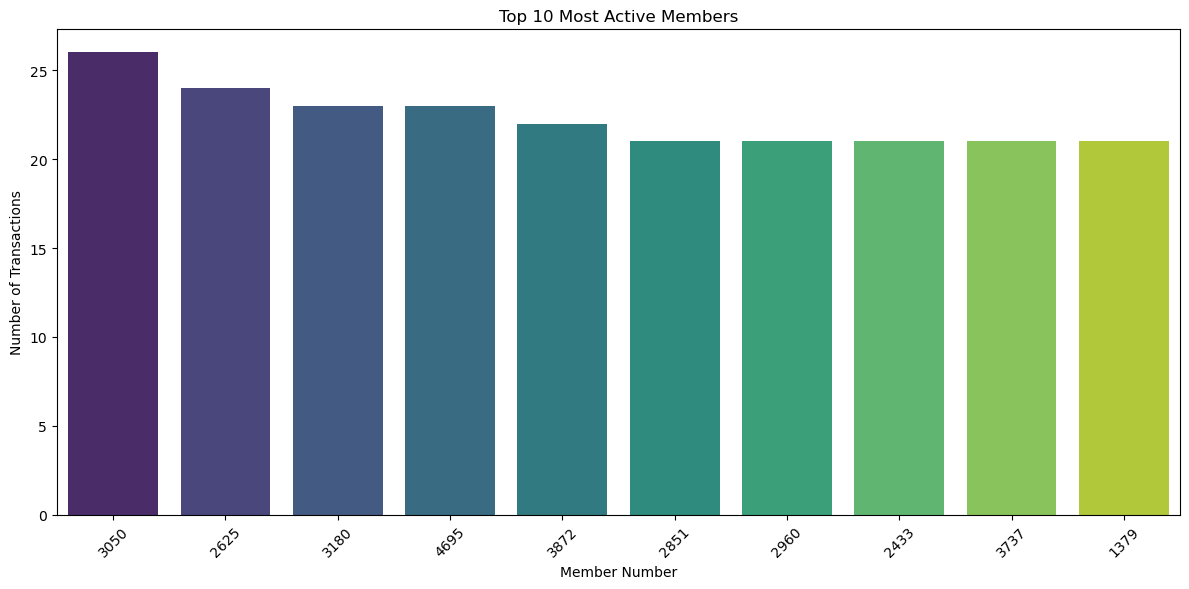

In [6]:
member_freq = df_train['Member_number'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=member_freq.index.astype(str), y=member_freq.values, order=member_freq.index.astype(str), palette='viridis')
plt.title('Top 10 Most Active Members')
plt.xlabel('Member Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.3 Item Frequency Overview: Top 10 Most Purchased Products

To better understand user purchasing behaviour we begin by identifying the top 10 most frequently purchased products in the dataset.

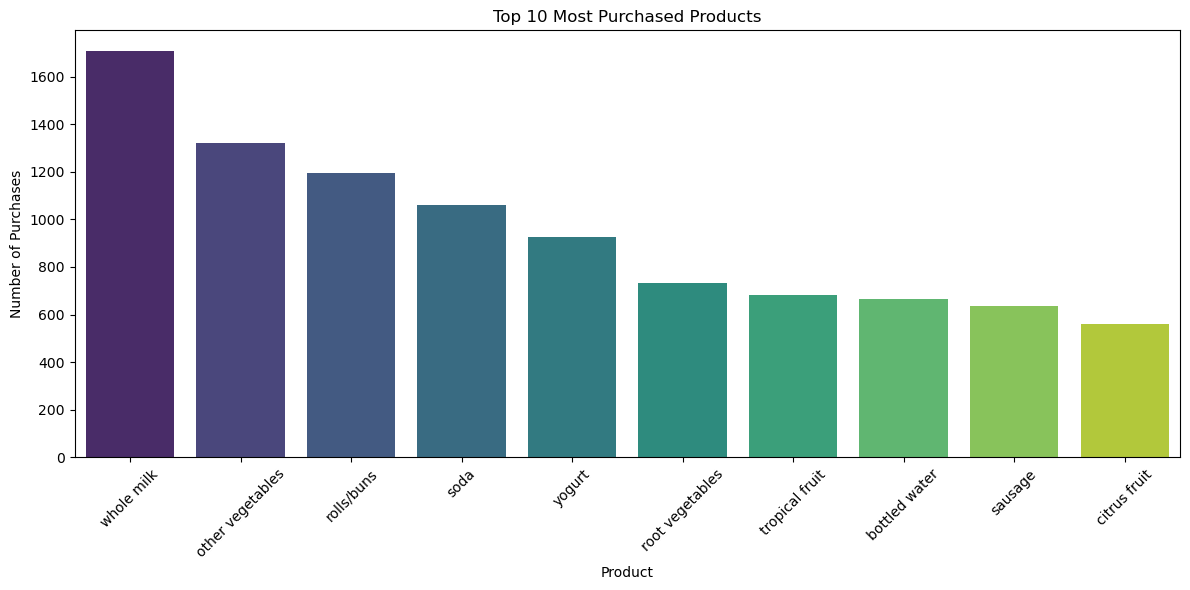

In [7]:
top_products = df_train['itemDescription'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.4 Time Series Analysis

##### 2.4.1 Monthly Purchase Trends

To understand how purchasing behaviour changes over time, we will perform a time series analysis to identify monthly purchase trends. This will help us understand seasonal patterns and overall trends in product purchases.

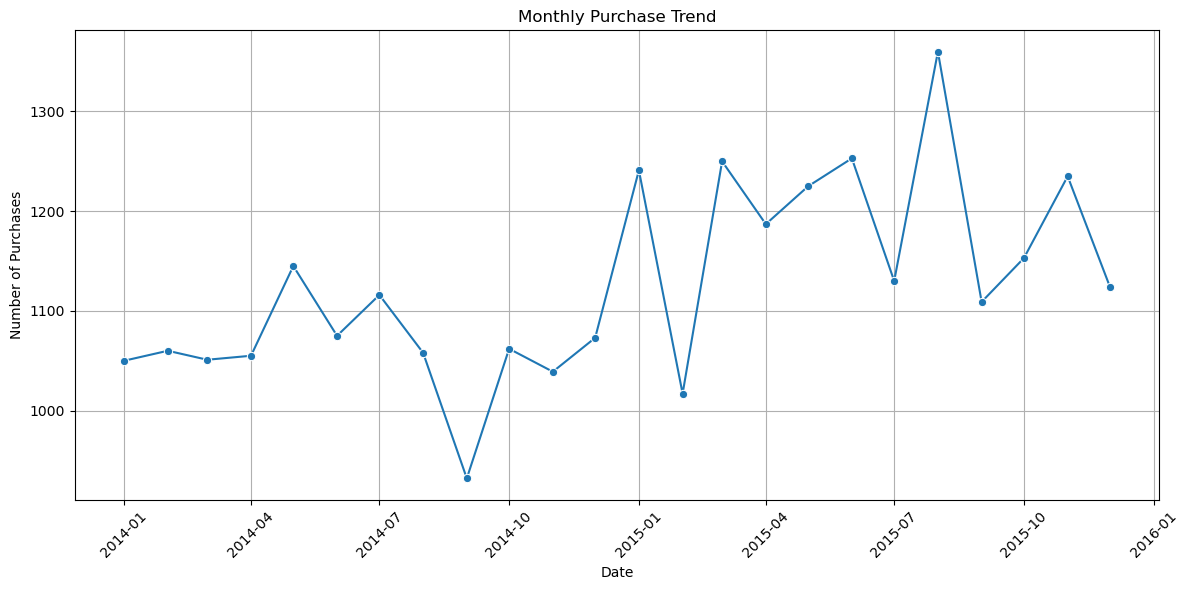

In [8]:
monthly_trend = df_train.groupby(['year', 'month']).size().reset_index(name='purchase_count')

monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

# Plotting the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='date', y='purchase_count', marker='o')
plt.title('Monthly Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.4.2 Purchase Trends by Day of the Week

This analysis shows how purchases are distributed across different days of the week. It helps us identify which days are most popular for purchases, indicating potential shopping patterns.

C:\temp\ipykernel_97236\3683421664.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train['Date'] = pd.to_datetime(df_train['Date'])


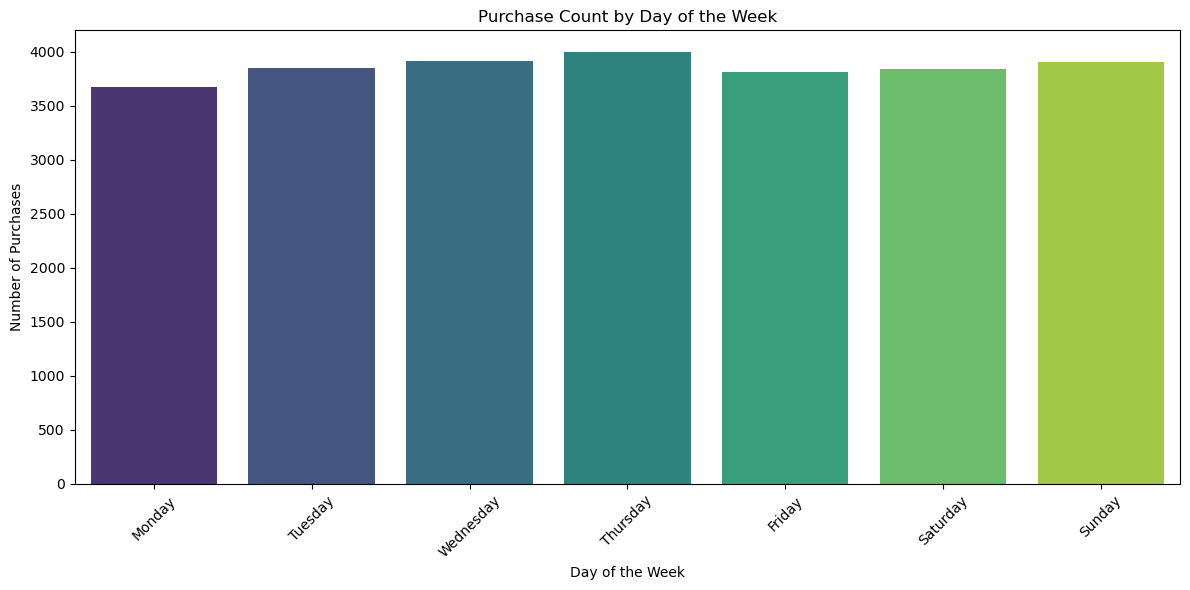

In [9]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day
df_train['day_of_week'] = df_train['Date'].dt.day_name()

# Analyzing purchase patterns by day of the week
day_of_week_trend = df_train.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index(name='purchase_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='purchase_count', data=day_of_week_trend, palette='viridis')
plt.title('Purchase Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We wanted to find out if there were any seasonal patterns, shopping habits or any sudden changes in demand. After looking at the number of purchases by month and by day of the week, we didn’t see any strong trends. This means that customers seem to shop regularly, and their behaviour stays mostly the same over time.

#### 2.5 Top 10 Most Commonly Bought Pairs

To understand how products are bought together, we will identify the top 10 most commonly bought pairs of items. This analysis will help us discover potential cross-selling opportunities and product associations.

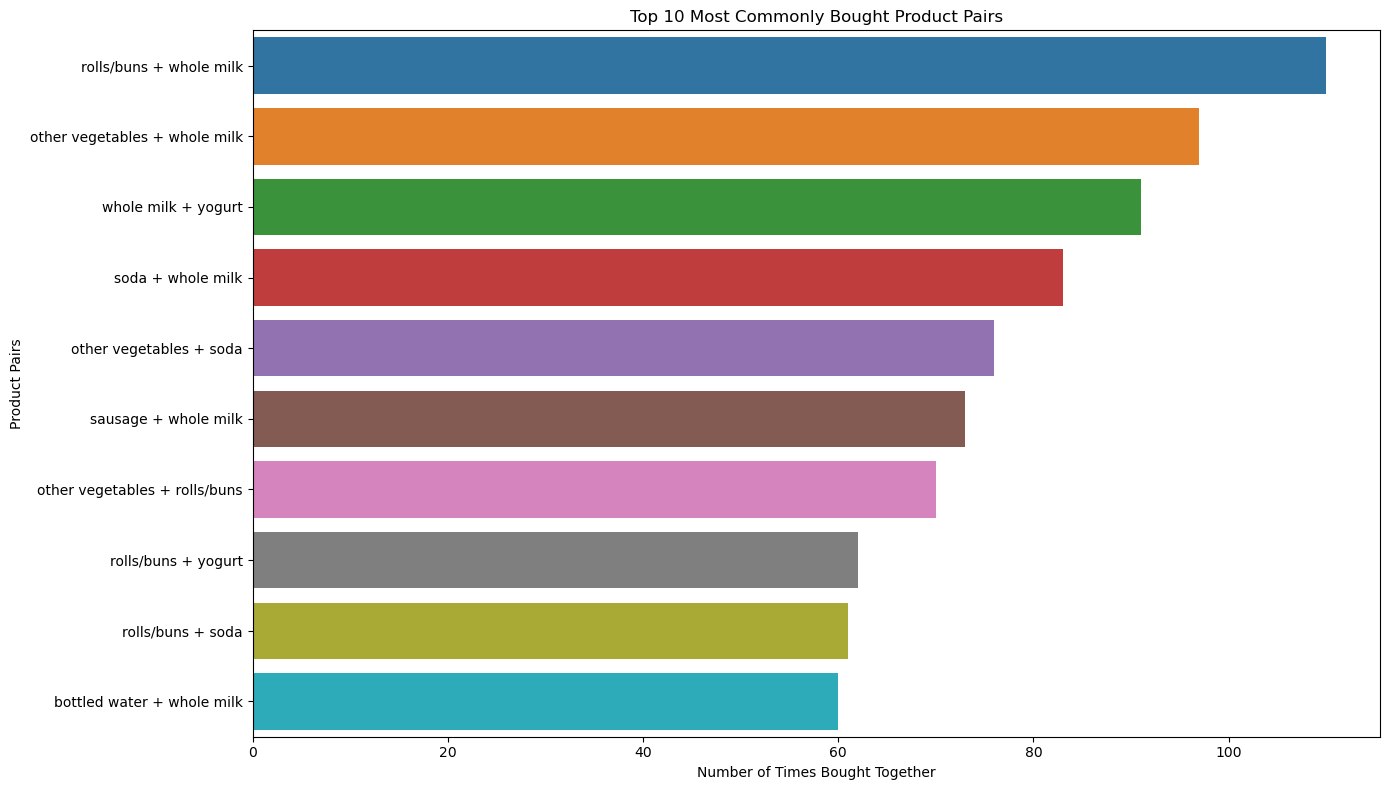

Top 10 Most Commonly Bought Pairs:
1. rolls/buns + whole milk: 110 times
2. other vegetables + whole milk: 97 times
3. whole milk + yogurt: 91 times
4. soda + whole milk: 83 times
5. other vegetables + soda: 76 times
6. sausage + whole milk: 73 times
7. other vegetables + rolls/buns: 70 times
8. rolls/buns + yogurt: 62 times
9. rolls/buns + soda: 61 times
10. bottled water + whole milk: 60 times


In [10]:
# Group by member and date to get items bought together in the same transaction
transactions = df_train.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# Generate pairs of items bought together
pairs = []
for items in transactions['itemDescription']:
    unique_items = sorted(set(items))  # remove duplicates
    if len(unique_items) > 1:
        for pair in combinations(unique_items, 2):
            pairs.append(pair)

pair_counts = pd.Series(pairs).value_counts().head(10)

# Create a more readable format for visualization
pair_labels = [f"{pair[0]} + {pair[1]}" for pair in pair_counts.index]

# Plotting the top 10 most commonly bought pairs
plt.figure(figsize=(14, 8))
sns.barplot(x=pair_counts.values, y=pair_labels)
plt.title('Top 10 Most Commonly Bought Product Pairs')
plt.xlabel('Number of Times Bought Together')
plt.ylabel('Product Pairs')
plt.tight_layout()
plt.show()

print("Top 10 Most Commonly Bought Pairs:")
for i, (pair, count) in enumerate(pair_counts.items(), 1):
    print(f"{i}. {pair[0]} + {pair[1]}: {count} times")

From the above output, we can see that some items are often bought together, like whole milk with rolls/buns or other vegetables. This shows clear patterns in how members shop and these patterns can be used to build better recommendation systems using frequent pattern mining.

### 3. Recommendation System Integration (with Stubbed Inputs)

To test the recommendation system without the full code from Task 1 and 2, we used simple stub methods that return fixed results to check if the system works correctly.
- `FrequentPatternMinerStub`: This stub returns a fixed set of frequent itemsets in pairs and their support counts, simulating the output of a frequent pattern mining algorithm.
- `CollaborativeFilteringModelStub`: This stub returns a fixed set of recommendations for a given member ID, simulating the output of a collaborative filtering model.

In [11]:
# Stub for frequent pattern mining
class FrequentPatternMinerStub:
    def __init__(self, input_data):
        self.input_data = input_data

    def mine_patterns(self):
        """
        Returns dummy frequent item pairs with confidence scores.
        """
        return {
            frozenset({'whole milk', 'rolls/buns'}): 0.0097,
            frozenset({'yogurt', 'whole milk'}): 0.0085,
            frozenset({'soda', 'whole milk'}): 0.0081,
            frozenset({'other vegetables', 'yogurt'}): 0.0073,
            frozenset({'sausage', 'whole milk'}): 0.0064,
        }
    
# Stub for collaborative filtering
class CollaborativeFilteringModelStub:
    def __init__(self, input_data):
        self.input_data = input_data

    def collab_filter(self, user_id):
        """
        Returns dummy CF recommendations for a user.
        """
        dummy_cf = {
            '3050': [('whole milk', 0.80), ('yogurt', 0.6), ('rolls/buns', 0.55)],
            '2625': [('soda', 0.65), ('canned beer', 0.55)],
            '3180': [('rolls/buns', 0.7)],
            '1001': [('other vegetables', 0.75), ('yogurt', 0.5)],
            '2002': [('sausage', 0.6), ('whole milk', 0.55)]
        }
        return dummy_cf.get(str(user_id), [])

In this method, we combine the outputs from pattern mining (Task 1) and collaborative filtering (Task 2) using a weighted scoring system. While the papers provided (Lee et al., 2001) and (Parvatikar et al., 2020) helped me understand the concepts and workflows of each technique, they did not clearly define how to merge them into a unified recommendation.

To achieve this, we followed the hybrid approach described in (Zhou et al., 2010), which uses weighted linear aggregation of scores. We gave more weight to collaborative filtering (0.7) as it tends to be more accurate, and less weight (0.3) to pattern mining, which captures general item associations.

If the user is new and not found in the CF model, the system defaults to top pattern based recommendations to avoid the cold-start issue.

In [20]:
class RecommendationSystemHybrid:
    def __init__(self, pattern_miner: FrequentPatternMinerStub, cf_model: CollaborativeFilteringModelStub):
        self.pattern_miner = pattern_miner
        self.cf_model = cf_model

    def recommend(self, top_k=5, user_id=None):
        """
        Combine pattern-based and CF-based recommendations using weighted scoring.
        """
        pattern_output = self.pattern_miner.mine_patterns()
        cf_output = self.cf_model.collab_filter(user_id)

        combined_scores = {}

        # Weighted contribution from frequent pattern mining
        for item_set, score in pattern_output.items():
            for item in item_set: 
                combined_scores[item] = combined_scores.get(item, 0) + score * 0.3

        # Weighted contribution from collaborative filtering
        for item, score in cf_output:
            combined_scores[item] = combined_scores.get(item, 0) + score * 0.7

        sorted_items = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_items[:top_k]

# --- Initialize stub models ---
pattern_stub = FrequentPatternMinerStub(df_train)
cf_stub = CollaborativeFilteringModelStub(df_train)
recommender = RecommendationSystemHybrid(pattern_stub, cf_stub)

user_id = 3050 # Existing member number
top_recs = recommender.recommend(top_k=5, user_id=user_id)

print("="*50)
print(f" Top {len(top_recs)} Product Recommendations for User ID: {user_id}")
print("-"*50)

for idx, (item, score) in enumerate(top_recs, 1):
    print(f"{idx}. {item:20} | Score: {score:.4f}")

print("="*50)

 Top 5 Product Recommendations for User ID: 3050
--------------------------------------------------
1. whole milk           | Score: 0.5698
2. yogurt               | Score: 0.4247
3. rolls/buns           | Score: 0.3879
4. soda                 | Score: 0.0024
5. other vegetables     | Score: 0.0022


In [21]:
user_id = 2000 # New member number
top_recs = recommender.recommend(top_k=5, user_id=user_id)

print("="*50)
print(f" Top {len(top_recs)} Product Recommendations for User ID: {user_id}")
print("-"*50)

for idx, (item, score) in enumerate(top_recs, 1):
    print(f"{idx}. {item:20} | Score: {score:.4f}")

print("="*50)

 Top 5 Product Recommendations for User ID: 2000
--------------------------------------------------
1. whole milk           | Score: 0.0098
2. yogurt               | Score: 0.0047
3. rolls/buns           | Score: 0.0029
4. soda                 | Score: 0.0024
5. other vegetables     | Score: 0.0022


### 4. References

1. Lee, C.-H. ., Kim, Y.-H. . and Rhee, P.-K. . (2001). Web personalization expert with combining collaborative filtering and association rule mining technique. Expert Systems with Applications, 21(3), pp.131–137. <<https://doi.org/10.1016/s0957-4174(01)00034-3>>
2. S. Parvatikar and B. Joshi, "Online book recommendation system by using collaborative filtering and association mining," 2015 IEEE International Conference on Computational Intelligence and Computing Research (ICCIC), Madurai, India, 2015, pp. 1-4. <<https://doi.org/10.1109/ICCIC.2015.7435717>>
3. Zhou, T., Kuscsik, Z., Liu, J.-G. ., Medo, M., Wakeling, J.R. and Zhang, Y.-C. . (2010). Solving the apparent diversity-accuracy dilemma of recommender systems. Proceedings of the National Academy of Sciences, 107(10), pp.4511–4515. <<https://doi.org/10.1073/pnas.1000488107>>